# <center> Tackling systematic off-resonant errors with CORPSE pulses: Theory and Demonstration using Qiskit
    
**Summary**: To rotate qubits on a quantum computer, one might drive the qubit with an electromagnetic pulse. However, when the driving frequency of this pulse differs from the resonant frequency of the qubit, the actually realized rotation is an imperfect rotation whose angle and axis of rotation differs from that intended. This is a major problem for quantum hardware, because it is very hard to avoid systematic errors in the driving pulses' frequency. However, by choosing to implement a single rotation as a series of multiple rotations, we may be able to substantially reduce the degree of error. This project examines one such example: the CORPSE pulse sequence.
    
The variables and notation in this project differ from one or more of the resources mentioned below, and so the results are also slightly different.

Here is a list of sources we used throughout the project:
- [1] https://arxiv.org/pdf/1209.4247.pdf
- [2] https://arxiv.org/pdf/quant-ph/0208092.pdf

(This seemingly empty cell is for markdown formatting.)

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$

<hr style="border:4px solid gray"> </hr>

## <center> 1. Introduction 

An ideal single-qubit rotation with rotation axis in the xy plane takes the form: 

$R(\theta, \phi) = \exp{[-i\theta \mathbf{n(\phi)} \
\cdot \sigma/2}]$

- $\theta$: rotation angle
- $\phi$: azimuthal angle, specifying the rotation axis within the xy-plane $\mathbf{n(\phi)} = (\cos{\phi}, \sin{\phi}, 0)$
- $\mathbf{\sigma} = (\sigma_x, \sigma_y, \sigma_z)$: Pauli vector operator

We will call pulses of this form **elementary pulses**.

In reality, such elementary rotations are imperfectly implemented on actual quantum backends, and the actually realized rotation is:

$$R'(\theta, \phi) = R(\theta, \phi) + O(\epsilon)$$

- $\epsilon$ quantifies the degree of error. 
    - $O(\epsilon)$ is the total error term. 

Suppose we have a sequence of N elementary pulses $\{R(\theta_i, \phi_i)\}$ each with a degree of error $\epsilon$:

$$U(\theta, \phi) = R(\theta_N, \phi_N) R(\theta_{N-1}, \phi_{N-1}) \dots R(\theta_1, \phi_1)$$

where $U(\theta, \phi)$ is constructed to be as close to $R(\theta, \phi)$ as possible. Then it is possible to show by simply multiplying all the elementary pulses together that:

$$U'(\theta, \phi) = R(\theta, \phi) - i\epsilon\delta U + O(\epsilon^2)$$

- $U'(\theta, \phi): $ actually realized $U(\theta, \phi)$ in the prescence of error
- $\delta U$: functional form of the error term which is first order in $\epsilon$
- $O(\epsilon^2)$: error second-order in $\epsilon$ and higher

The N elementary pulses $\{R(\theta_i, \phi_i)\}$ compose of a **composite pulse** if they are chosen to make $\delta U$=0, so that the degree of error in $U'$ is only of second order or higher: 

$$U'(\theta, \phi) = R(\theta, \phi) + O(\epsilon^2)$$

## <center> 2. Off-resonant Errors (ORE)

An ideal elementary pulse has a rotation axis in the xy plane. However, when an ORE is present, the actual rotation axis has a component in the z-axis. Then the actually realized elementary pulse is:

$$R'_f(\theta, \phi) = \exp{[-i\theta (\mathbf{n(\phi)} \cdot \sigma + f \sigma_z)/2]}
\approx
R(\theta, \phi) -if\sin(\theta/2)\sigma_z$$

- $f$ is some constant (unknown to the experimenter) quantifying the strength of the ORE

As disccused in references [1], [2], The **CORPSE pulse sequence (Concatenated Composite Pulses Compensating Simultaneous Systematic Errors)** is a composite pulse designed to suppress the deleterious effects of ORE.

For a target rotation with parameters $\theta, \phi$, a CORPSE pulse sequence consists of three elementary pulses indexed by $1,2,3$:

|Rotation Index| Rotation Angle | Azimuthal Angle |
| :-          | :-             | :-:             |
|1             | $ 2n_1\pi + \theta/2 - k$ | $\phi$ |
|2             | $ 2n_2\pi - 2k$ | $\phi + \pi$ |
|3             | $ 2n_3\pi + \theta/2 - k$ | $\phi$ |

- $k = \arcsin[\sin(\theta/2)/2]$
- $n_i \in \mathbb{Z}$


We usually take $n_1 = 1, n_2 = 1, n_3 = 0$. Then:

|Rotation Index| Rotation Angle | Azimuthal Angle |
| :-          | :-             | :-:             |
|1             | $ 2\pi + \theta/2 - k$ | $\phi$ |
|2             | $ 2\pi - 2k$ | $\phi + \pi$ |
|3             | $ \theta/2 - k$ | $\phi$ |

Where do these values come from? In short,the authors of reference [2] derive these results by taylor expanding the composite rotation as a function the off-resonant error, and solving for the conditions which cause the first-degree term to vanish.

## <center> 3. An Interactive example

### <center> a) Theory

**For the reminder of this project, we assume that we want to implement an elementary $\theta$ = $180^{\circ}=\pi$ rotation**—for example, if we want to rotate a qubit from $\ket{0}$ to $\ket{1}$.

Also, **For the reminder of this project, suppose that our rotation axis is the +x-axis**, corresponding to 
$\mathbf{n(\phi)} = (\cos{\phi}, \sin{\phi}, 0) = (1, 0, 0)$. Hence, $\phi = 0$. 

From the table in section 2, the CORPSE pulse sequence corresponding to that target rotation would be:

In [852]:
import numpy as np

print('\033[1m' + "Target rotation" + '\033[0m')
theta = np.pi 
print(f"theta:", theta*(180/np.pi), "degrees")

print('\033[1m' + "CORPSE sequence" + '\033[0m')
theta1 = 2*np.pi + theta/2 - np.arcsin(np.sin(theta/2)/2)
print(f"theta1:", theta1*(180/np.pi), "degrees")

theta2 = 2*np.pi - 2*np.arcsin(np.sin(theta/2)/2)
print(f"theta2:", theta2*(180/np.pi), "degrees")

theta3 = theta/2 - np.arcsin(np.sin(theta/2)/2)
print(f"theta3:", theta3*(180/np.pi), "degrees")

Target rotation
theta: 180.0 degrees
CORPSE sequence
theta1: 420.0 degrees
theta2: 300.0 degrees
theta3: 60.00000000000001 degrees


Lets demonstrate the performance of this CORPSE pulse. Suppose $f = 0.1$. Then the actually realized elementary pulse is:

$
R'_f(\theta, \phi) = \exp{[-i\theta (\mathbf{n(\phi)} \cdot \sigma + f \sigma_z)/2]}
$

$
\approx
R(\theta, \phi) - if\sin(\theta/2)\sigma_z
$

$
=
R(\theta, \phi) - i(0.1)\sin(\theta/2)\sigma_z
=
\exp{[-i\theta \
\sigma_{x}/2}] - i(0.1)\sin(\theta/2)\sigma_z
$ 

$
=\cos(\theta/2)I - i\sin(\theta/2)\sigma_x - i(0.1)\sin(\theta/2)\sigma_z
$

$
=\cos(\pi/2)I - i\sin(\pi/2)\sigma_x - i(0.1)\sin(\pi/2)\sigma_z
$

$
= -i\sigma_x - 0.1 i \sigma_z
$

$
= -i(\sigma_x - 0.1 \sigma_z)
$

Although this approximate expression is great for us to get an intuitive feel for what the off-resonant error looks like (since it is a linear combination of the sum of the desired term, $\sigma_x$, and the error term, $\sigma_z$) we notice that we cannot actually plot this on the bloch sphere because this operator is not unitary. 

We employ a convenient fix of this problem.

Define $\bar{\sigma}$ 
$ = (\frac{1}{\sqrt{1+\gamma^2}}, 0, \frac{\gamma}{\sqrt{1+\gamma^2}}) \cdot \sigma $

$= \frac{\gamma}{\sqrt{1+\gamma^2}} \sigma_z + \frac{1}{\sqrt{1+\gamma^2}} \sigma_x $ 

- $\gamma$: alternate parameter that quantifies the degree of ORE
    - $\gamma$ can be any real number
- $\sigma$: Pauli vector $(\sigma_x, \sigma_y, \sigma_z)$

$\bar{\sigma}$ is a unitary operator because the vector $(\frac{1}{\sqrt{1+\gamma^2}}, 0, \frac{\gamma}{\sqrt{1+\gamma^2}})$ has unit length: $(\frac{1}{\sqrt{1+\gamma^2}})^2 + 0^2 + (\frac{\gamma}{\sqrt{1+\gamma^2}})^2 = 1$

Hence, the actually realized elementary pulse is:

$U = \exp{[-i\theta\bar{\sigma})/2}]$

$ = \cos(\theta/2)I - i\sin(\theta/2)\bar{\sigma}$

$ = \cos(\theta/2)I - i\sin(\theta/2)(\frac{\gamma}{\sqrt{1+\gamma^2}} \sigma_z + \frac{1}{\sqrt{1+\gamma^2}} \sigma_x) $

As a sanity check, let's check what happens in the case when there is no error, $\gamma = 0$. Then 

$ = \cos(\theta/2)I - i\sin(\theta/2)(\frac{0}{\sqrt{1+0^2}} \sigma_z + \frac{1}{\sqrt{1+0^2}} \sigma_x)$
$ = \cos(\theta/2)I - i\sin(\theta/2)\sigma_x$, as desired.

### <center> b) Play around!

<center> In the following subsection, we will visualize this using Qiskit!

Let us first find the ideal elementary rotation from $\ket{0}$ to $\ket{1}$, and the corresponding resulting state.

In [853]:
from qiskit.quantum_info.operators import Operator
from qiskit.opflow import I, X, Y, Z

theta = np.pi

ideal = np.cos(theta/2) * I - (1j) * np.sin(theta/2) * X
ideal_op = Operator(ideal)

from qiskit.visualization import array_to_latex
array_to_latex(ideal_op, prefix = "\\text{Ideal Rotation:}")

<IPython.core.display.Latex object>

In [854]:
array_to_latex([0, 1], prefix = "\\text{Ideal Resulting Vector:}")

<IPython.core.display.Latex object>

## How about an actually realized rotation from $\ket{0}$ to $\ket{1}$ in the prescence of ORE? Play around with the value of $\gamma$ below, and run the subsequent cells.

We set the slider over a representative range of 0 to 20. 

In [855]:
import ipywidgets as widgets
from IPython.display import display

gamma_slider = widgets.FloatSlider(
    value = 0,
    min = 0,
    max = 20,
    step = 0.1,
    description = r'$\gamma$=',
    continuous_update = True
)

widgets.VBox([gamma_slider],
            layout = widgets.Layout(align_items = 'center'))

In [856]:
gamma = gamma_slider.value

actual = np.cos(theta/2) * I - (1j) * np.sin(theta/2) * (
        (gamma / np.sqrt(1 + gamma ** 2)) * Z + (1 / np.sqrt(1 + gamma ** 2) * X)
    )
actual_op = Operator(actual)

array_to_latex(actual_op, prefix = "\\text{Actually Realized Rotation:}")

<IPython.core.display.Latex object>

In [857]:
# create quantum circuit
from qiskit import QuantumCircuit
from qiskit.circuit import ClassicalRegister, QuantumRegister

cr = ClassicalRegister(1, name = "cr")
qr = QuantumRegister(1, name = "qr")
qc = QuantumCircuit(cr, qr)

qc.unitary(actual_op, 0, label = "Actually Realized Rotation")
qc.draw()

┌────────────────────────────┐
qr_0: ┤ Actually Realized Rotation ├
      └────────────────────────────┘
cr: 1/══════════════════════════════

In [858]:
# execute circuit
from qiskit import Aer, execute

statevec_sim = Aer.get_backend('statevector_simulator')
job = execute(experiments = qc, backend = statevec_sim)
result_vector = job.result().get_statevector()
result_vector_adjustedphase = np.array(result_vector)*1j # times i to cancel out -i global phase of operator

# round each component of each entry of vector 
result_vector_adjustedphase_rounded = np.array(
    [round(result_vector_adjustedphase[0].real, 4) + round(result_vector_adjustedphase[0].imag, 4)*1j, 
     round(result_vector_adjustedphase[1].real, 4) + round(result_vector_adjustedphase[1].imag, 4)*1j]
         )

array_to_latex(result_vector_adjustedphase_rounded, 
               prefix = "\\text{Actual Resulting Statevector:}")

<IPython.core.display.Latex object>

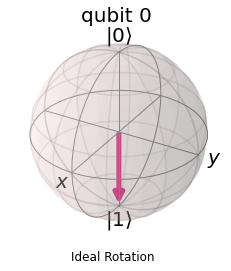

In [859]:
# visualize results
from qiskit.visualization import plot_bloch_multivector
from matplotlib.pyplot import plot as plt
%matplotlib inline

idealrot_fig = plot_bloch_multivector([0,1])
idealrot_fig.suptitle('Ideal Rotation', y = 0.1)
idealrot_fig

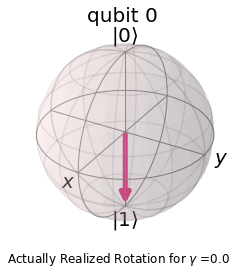

In [860]:
actualrot_fig = plot_bloch_multivector(result_vector_adjustedphase_rounded)
actualrot_fig.suptitle(r'Actually Realized Rotation for $\gamma$ =' + f'{gamma}', y = 0.1)
actualrot_fig

To quantify how good or bad this result is, we can measure the fidelity between the ideal and actual state vectors.

In [861]:
from qiskit.quantum_info import state_fidelity
print('\033[1m' + 'Fidelity:'+ '\033[0m', str(state_fidelity(result_vector_adjustedphase, [0 , 1])))

Fidelity: 1.0


# <center> 4. A deeper dive

Let us plot the fidelity as a function of $\gamma$.

In [862]:
gamma_array = np.linspace(start = 0, stop = 20, num = 500)
fidelity_array = []
for gamma in gamma_array:
    # create actual rot op
    actual = np.cos(theta/2) * I - (1j) * np.sin(theta/2) * (
        (gamma / np.sqrt(1 + gamma ** 2)) * Z + (1 / np.sqrt(1 + gamma ** 2) * X)
    )
    actual_op = Operator(actual)
    # create qc
    cr = ClassicalRegister(1, name = "cr")
    qr = QuantumRegister(1, name = "qr")
    qc = QuantumCircuit(cr, qr)
    qc.unitary(actual_op, 0, label = "Actually Realized Rotation")
    # run qc
    statevec_sim = Aer.get_backend('statevector_simulator')
    job = execute(experiments = qc, backend = statevec_sim)
    # get resulting statevector
    result_vector = job.result().get_statevector()
    result_vector_adjustedphase = np.array(result_vector)*1j # times i to cancel out -i global phase of operator
    # calculate fidelity
    fidelity_value = state_fidelity(result_vector_adjustedphase, [0 , 1])
    fidelity_array.append(fidelity_value)

Text(0, 0.5, 'Fidelity')

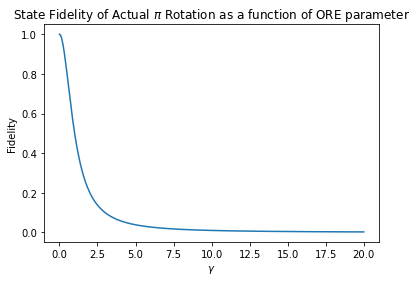

In [863]:
# plot results
import matplotlib.pyplot as plt
plt.plot(gamma_array, fidelity_array)
plt.title("State Fidelity of Actual $\pi$ Rotation as a function of ORE parameter")
plt.xlabel(r"$\gamma$")
plt.ylabel("Fidelity")

As expected, the fidelity is 1 when there is no ORE. When $\gamma$ increases, the fidelity monotonically decreases.

Let's see what happens with a CORPSE pulse. Lets again start off with an interactive example. Again, choose the value of the ORE parameter below. We call it $\gamma_2$ to avoid conflicting it with the previous interactive example's slider.

In [864]:
gamma2_slider = widgets.FloatSlider(
    value = 0,
    min = 0,
    max = 20,
    step = 0.1,
    description = r'$\gamma_2$=',
    continuous_update = True
)

widgets.VBox([gamma2_slider],
            layout = widgets.Layout(align_items = 'center'))

In [865]:
gamma = gamma2_slider.value
theta = np.pi

CORPSE1_theta = 2*np.pi + theta/2 - np.arcsin(np.sin(theta/2)/2)
CORPSE2_theta = 2*np.pi - 2* np.arcsin(np.sin(theta/2)/2)
CORPSE3_theta = theta/2 - np.arcsin(np.sin(theta/2)/2)

print("CORPSE rotation 1 degrees:", CORPSE1_theta * 180/np.pi)
print("CORPSE rotation 2 degrees:", CORPSE2_theta * 180/np.pi)
print("CORPSE rotation 3 degrees:", CORPSE3_theta * 180/np.pi)

CORPSE rotation 1 degrees: 419.99999999999994
CORPSE rotation 2 degrees: 300.00000000000006
CORPSE rotation 3 degrees: 60.00000000000001


In [866]:
CORPSE1 = np.cos(CORPSE1_theta/2) * I - (1j) * np.sin(CORPSE1_theta/2) * (
        (gamma / np.sqrt(1 + gamma ** 2)) * Z + (1 / np.sqrt(1 + gamma ** 2) * X)
    )

CORPSE2 = np.cos(CORPSE2_theta/2) * I - (1j) * np.sin(CORPSE2_theta/2) * (
        (gamma / np.sqrt(1 + gamma ** 2)) * Z + (1 / np.sqrt(1 + gamma ** 2) * (-X))
    )

CORPSE3 = np.cos(CORPSE3_theta/2) * I - (1j) * np.sin(CORPSE3_theta/2) * (
        (gamma / np.sqrt(1 + gamma ** 2)) * Z + (1 / np.sqrt(1 + gamma ** 2) * X)
    )

CORPSE1_op = Operator(CORPSE1)
CORPSE2_op = Operator(CORPSE2)
CORPSE3_op = Operator(CORPSE3)

In [867]:
cr = ClassicalRegister(1, name = "cr")
qr = QuantumRegister(1, name = "qr")
qc = QuantumCircuit(cr, qr)
qc.unitary(CORPSE1_op, 0, label = "CORPSE rotation 1")
qc.unitary(CORPSE2_op, 0, label = "CORPSE rotation 2")
qc.unitary(CORPSE3_op, 0, label = "CORPSE rotation 3")
qc.draw()

┌───────────────────┐┌───────────────────┐┌───────────────────┐
qr_0: ┤ CORPSE rotation 1 ├┤ CORPSE rotation 2 ├┤ CORPSE rotation 3 ├
      └───────────────────┘└───────────────────┘└───────────────────┘
cr: 1/═══════════════════════════════════════════════════════════════

In [868]:
statevec_sim = Aer.get_backend('statevector_simulator')
job = execute(experiments = qc, backend = statevec_sim)
result_vector = job.result().get_statevector()
result_vector_adjustedphase = np.array(result_vector)*1j # times i to cancel out -i global phase of operator
result_vector_adjustedphase

print('\033[1m' + 'Fidelity:'+ '\033[0m', str(state_fidelity(result_vector_adjustedphase, [0 , 1])))

Fidelity: 1.0


Depending on what you chose for $\gamma$, the fidelity might have been much worse or much better than you expected. Let's plot the fidelity as a function of representative values of $\gamma$ and see what happens.

In [869]:
gamma_array_2 = np.linspace(start = 0, stop = 20, num = 500)
fidelity_array_2 = []
for gamma in gamma_array_2:
    # create actual rot ops
    CORPSE1_theta = 2*np.pi + theta/2 - np.arcsin(np.sin(theta/2)/2)
    CORPSE2_theta = 2*np.pi - 2* np.arcsin(np.sin(theta/2)/2)
    CORPSE3_theta = theta/2 - np.arcsin(np.sin(theta/2)/2)

    CORPSE1 = np.cos(CORPSE1_theta/2) * I - (1j) * np.sin(CORPSE1_theta/2) * (
            (gamma / np.sqrt(1 + gamma ** 2)) * Z + (1 / np.sqrt(1 + gamma ** 2) * X)
        )

    CORPSE2 = np.cos(CORPSE2_theta/2) * I - (1j) * np.sin(CORPSE2_theta/2) * (
            (gamma / np.sqrt(1 + gamma ** 2)) * Z + (1 / np.sqrt(1 + gamma ** 2) * (-X))
        )

    CORPSE3 = np.cos(CORPSE3_theta/2) * I - (1j) * np.sin(CORPSE3_theta/2) * (
            (gamma / np.sqrt(1 + gamma ** 2)) * Z + (1 / np.sqrt(1 + gamma ** 2) * X)
        )

    CORPSE1_op = Operator(CORPSE1)
    CORPSE2_op = Operator(CORPSE2)
    CORPSE3_op = Operator(CORPSE3)
    # create qc
    cr = ClassicalRegister(1, name = "cr")
    qr = QuantumRegister(1, name = "qr")
    qc = QuantumCircuit(cr, qr)
    qc.unitary(CORPSE1_op, 0, label = "CORPSE rotation 1")
    qc.unitary(CORPSE2_op, 0, label = "CORPSE rotation 2")
    qc.unitary(CORPSE3_op, 0, label = "CORPSE rotation 3")
    # run qc
    statevec_sim = Aer.get_backend('statevector_simulator')
    job = execute(experiments = qc, backend = statevec_sim)
    # get resulting statevector
    result_vector = job.result().get_statevector()
    result_vector_adjustedphase = np.array(result_vector)*1j # times i to cancel out -i global phase of operator
    # calculate fidelity
    fidelity_value = state_fidelity(result_vector_adjustedphase, [0 , 1])
    fidelity_array_2.append(fidelity_value)

Text(0, 0.5, 'Fidelity')

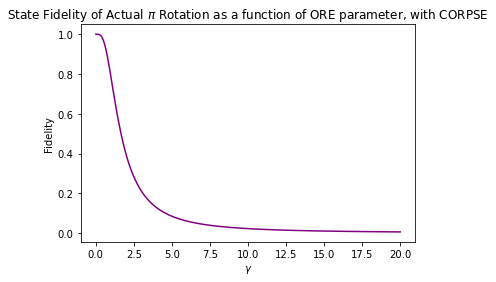

In [870]:
# plot results
import matplotlib.pyplot as plt
plt.plot(gamma_array_2, fidelity_array_2, color = "purple")
plt.title("State Fidelity of Actual $\pi$ Rotation as a function of ORE parameter, with CORPSE")
plt.xlabel(r"$\gamma$")
plt.ylabel("Fidelity")

Let's plot the two cases together so we can compare the results.

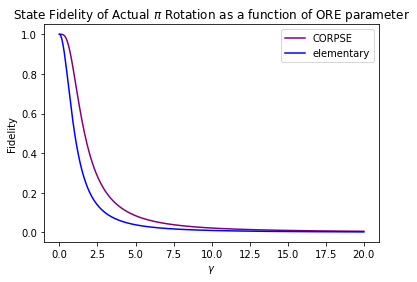

In [871]:
from matplotlib.lines import Line2D

# compare CORPSE with previous case 
plt.plot(gamma_array_2, fidelity_array_2, color = "purple")
plt.plot(gamma_array, fidelity_array, color = "blue")
plt.title(r"State Fidelity of Actual $\pi$ Rotation as a function of ORE parameter")
plt.xlabel(r"$\gamma$")
plt.ylabel("Fidelity")

legend_elements = [Line2D([0], [0], color = 'purple', label = 'CORPSE'),
                   Line2D([0], [0], color = 'blue', label = 'elementary')]         
plt.legend(handles = legend_elements)

Since the fidelity drops asympotically towards zero, let's compare the two plots again but within a much narrower range.

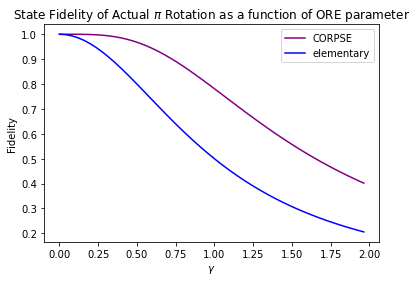

In [872]:
# compare CORPSE with previous case 
plt.plot(gamma_array_2[0:50], fidelity_array_2[0:50], color = "purple")
plt.plot(gamma_array[0:50], fidelity_array[0:50], color = "blue")
plt.title(r"State Fidelity of Actual $\pi$ Rotation as a function of ORE parameter")
plt.xlabel(r"$\gamma$")
plt.ylabel("Fidelity")

legend_elements = [Line2D([0], [0], color = 'purple', label = 'CORPSE'),
                   Line2D([0], [0], color = 'blue', label = 'elementary')]         
plt.legend(handles = legend_elements)

Alternatively, we can plot the fidelity on a log scale.

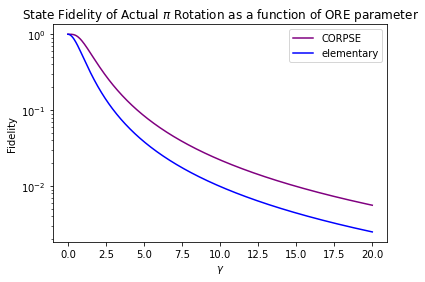

In [873]:
# compare CORPSE with previous case, but now with log scale
plt.plot(gamma_array_2, fidelity_array_2, color = "purple")
plt.plot(gamma_array, fidelity_array, color = "blue")
plt.title(r"State Fidelity of Actual $\pi$ Rotation as a function of ORE parameter")
plt.xlabel(r"$\gamma$")
plt.ylabel("Fidelity")
plt.yscale("log")

legend_elements = [Line2D([0], [0], color = 'purple', label = 'CORPSE'),
                   Line2D([0], [0], color = 'blue', label = 'elementary')]         
plt.legend(handles = legend_elements)

## <center> Takeaways
This is incredible! Under the assumptions and definitions above, we see that the CORPSE pulse mitigates the effects of ORE across all values of $\gamma$, and is especially robust when the ORE is small (i.e. in the regime where $\gamma \approx 0$). 

# <center> 5. An Even Deeper Dive

For the remainder of this section, we will redefine the parameter of ORE as $\gamma = \frac{\Delta}{\Omega}$ and call it the **detuning ratio**.

- $\Delta$: detuning
- $\Omega$: Rabi frequency of qubit

Via the derivation from "Notes on Quantum Information", an imperfect elementary rotation operator is represented by the matrix:

$U_\theta = \cos{\frac{\theta}{2}\sqrt{1+\gamma^2}} I - i\sin{\frac{\theta}{2}\sqrt{1+\gamma^2}} \bar{\sigma}$

- $\bar{\sigma}$: $\frac{\gamma}{\sqrt{1+\gamma^2}} \sigma_z + \frac{1}{\sqrt{1+\gamma^2}} \sigma_x$

In [874]:
## choose gamma
gamma3_slider = widgets.FloatSlider(
    value = 0,
    min = 0,
    max = 1,
    step = 0.1,
    description = r'$\gamma$=',
    continuous_update = True
)

widgets.VBox([gamma3_slider],
            layout = widgets.Layout(align_items = 'center'))

In [875]:
# create operator
gamma = gamma3_slider.value
barsigma = gamma / np.sqrt(1 + gamma ** 2) * Z + \
           1 / np.sqrt(1 + gamma ** 2) * X

actual = np.cos((theta/2) * np.sqrt(1 + gamma **2)) * I - \
         (1j) * np.sin((theta/2) * np.sqrt(1 +gamma **2)) * barsigma
actual_op = Operator(actual)

We can run a sanity check on our derivation by verifying that our operator is indeed unitary, and hence a valid rotation in Hilbert space.

In [876]:
print("actual_op is unitary? " + str(actual_op.is_unitary()) + '.')

actual_op is unitary? True.


In [877]:
# create circuit
cr = ClassicalRegister(1, name = "cr")
qr = QuantumRegister(1, name = "qr")
qc = QuantumCircuit(cr, qr)

qc.unitary(actual_op, 0, label = "Actually Realized Rotation")
qc.draw()

┌────────────────────────────┐
qr_0: ┤ Actually Realized Rotation ├
      └────────────────────────────┘
cr: 1/══════════════════════════════

In [878]:
# execute circuit
statevec_sim = Aer.get_backend('statevector_simulator')
job = execute(experiments = qc, backend = statevec_sim)
result_vector = job.result().get_statevector()
result_vector_adjustedphase = np.array(result_vector)*1j # times i to cancel out -i global phase of operator
result_vector_adjustedphase

array([0.+6.123234e-17j, 1.+0.000000e+00j])

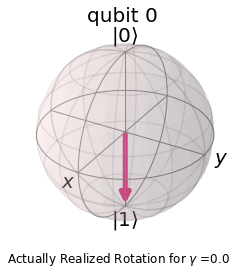

In [879]:
# plot result
actualrot_fig = plot_bloch_multivector(result_vector_adjustedphase)
actualrot_fig.suptitle(r'Actually Realized Rotation for $\gamma$ =' + f'{gamma}', y = 0.1)
actualrot_fig

Again, we plot the fidelity over the full representative range of ORE and see what happens.

In [880]:
gamma_array = np.linspace(start = 0, stop = 1, num = 500)
fidelity_array = []
for gamma in gamma_array:
    # create actual rot op
    barsigma = gamma / np.sqrt(1 + gamma ** 2) * Z + \
               1 / np.sqrt(1 + gamma ** 2) * X

    actual = np.cos((theta/2) * np.sqrt(1 + gamma **2)) * I - \
             (1j) * np.sin((theta/2) * np.sqrt(1 + gamma **2)) * barsigma
    actual_op = Operator(actual)
    # create qc
    cr = ClassicalRegister(1, name = "cr")
    qr = QuantumRegister(1, name = "qr")
    qc = QuantumCircuit(cr, qr)
    qc.unitary(actual_op, 0, label = "Actually Realized Rotation")
    # run qc
    statevec_sim = Aer.get_backend('statevector_simulator')
    job = execute(experiments = qc, backend = statevec_sim)
    # get resulting statevector
    result_vector = job.result().get_statevector()
    result_vector_adjustedphase = np.array(result_vector)*1j # times i to cancel out -i global phase of operator
    # calculate fidelity
    fidelity_value = state_fidelity(result_vector_adjustedphase, [0 , 1])
    fidelity_array.append(fidelity_value)

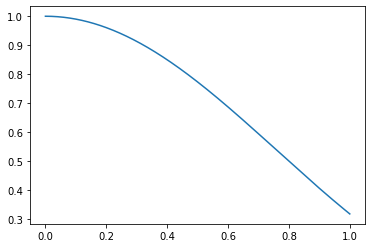

In [881]:
# plot results
plt.plot(gamma_array, fidelity_array)

What about CORPSE?

In [882]:
gamma_array_2 = np.linspace(start = 0, stop = 1, num = 500)
fidelity_array_2 = []
for gamma in gamma_array_2:
    # create actual rot ops
    CORPSE1_theta = 2*np.pi + theta/2 - np.arcsin(np.sin(theta/2)/2)
    CORPSE2_theta = 2*np.pi - 2* np.arcsin(np.sin(theta/2)/2)
    CORPSE3_theta = theta/2 - np.arcsin(np.sin(theta/2)/2)
    
    barsigma = gamma / np.sqrt(1 + gamma ** 2) * Z + \
               1 / np.sqrt(1 + gamma ** 2) * X 
    
    barsigma_minusx = gamma / np.sqrt(1 + gamma ** 2) * Z + \
               1 / np.sqrt(1 + gamma ** 2) * (-X)

    CORPSE1 = np.cos((CORPSE1_theta/2) * np.sqrt(1 + gamma **2)) * I - \
             (1j) * np.sin((CORPSE1_theta/2) * np.sqrt(1 + gamma **2)) * barsigma
    
    CORPSE2 = np.cos((CORPSE2_theta/2) * np.sqrt(1 + gamma **2)) * I - \
             (1j) * np.sin((CORPSE2_theta/2) * np.sqrt(1 + gamma **2)) * barsigma_minusx
    
    CORPSE3 = np.cos((CORPSE3_theta/2) * np.sqrt(1 + gamma **2)) * I - \
             (1j) * np.sin((CORPSE3_theta/2) * np.sqrt(1 + gamma **2)) * barsigma

    CORPSE1_op = Operator(CORPSE1)
    CORPSE2_op = Operator(CORPSE2)
    CORPSE3_op = Operator(CORPSE3)
    # create qc
    cr = ClassicalRegister(1, name = "cr")
    qr = QuantumRegister(1, name = "qr")
    qc = QuantumCircuit(cr, qr)
    qc.unitary(CORPSE1_op, 0, label = "CORPSE rotation 1")
    qc.unitary(CORPSE2_op, 0, label = "CORPSE rotation 2")
    qc.unitary(CORPSE3_op, 0, label = "CORPSE rotation 3")
    # run qc
    statevec_sim = Aer.get_backend('statevector_simulator')
    job = execute(experiments = qc, backend = statevec_sim)
    # get resulting statevector
    result_vector = job.result().get_statevector()
    result_vector_adjustedphase = np.array(result_vector)*1j # times i to cancel out -i global phase of operator
    # calculate fidelity
    fidelity_value = state_fidelity(result_vector_adjustedphase, [0 , 1])
    fidelity_array_2.append(fidelity_value)

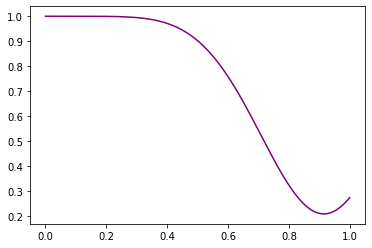

In [883]:
plt.plot(gamma_array_2, fidelity_array_2, color  = "purple")

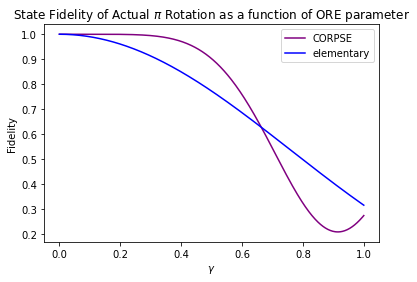

In [885]:
# compare CORPSE with previous case 
plt.plot(gamma_array_2, fidelity_array_2, color = "purple")
plt.plot(gamma_array, fidelity_array, color = "blue")
plt.title(r"State Fidelity of Actual $\pi$ Rotation as a function of ORE parameter")
plt.xlabel(r"$\gamma$")
plt.ylabel("Fidelity")

legend_elements = [Line2D([0], [0], color = 'purple', label = 'CORPSE'),
                   Line2D([0], [0], color = 'blue', label = 'elementary')]         
plt.legend(handles = legend_elements)

# <center> Conclusion
We see that as long as $\gamma$ is less than roughly 0.65, using a CORPSE pulse will allow as to mitigate the effects of an ORE! This is very close to the results of reference [1], where they use a slightly different variable to parameterize the ORE.
    
# <center> Next steps for this project
- Develop notebook to include arbitrary azimuthal angle $\phi$, instead of just along x-axis
- Develop interactive calculator that customizes any CORPSE pulse pased on user input, and simulates result in circuit
- Improve notebook formatting